In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=bba17a360e9b1677c572962d111e2d85534e6a23ad06af633194668cbacb2eda
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
!pwd

/content


In [ ]:
!head /content/drive/MyDrive/'Copy of final_table.csv'

trans_id,trans_dt,store_id,cust_id,prod_id,sales_amt,sales_qty,sales_wgt,prod_desc,prod_section,prod_category,prod_subcategory,prod_type,prod_mfc_brand_cd,prod_unit_qty_count,prod_count_uom,prod_uom_value
170626010790603094,2017-06-26,1079,1129468649,20863017,6.99,1,0.0,YVES FALAFEL BALLS,Deli,Gourmet Foods,Gourmet Foods,Meat Alternatives,YVES,1.0,G,240.0
170626010790603067,2017-06-26,1079,1048060135,20425475,12.09,1,0.0,ACSE LEMON AND LIME JUICER,Home,Kitchen Prep,Kitchen Gadgets,Baking & Cooking,ACSE,1.0,EA,1.0
170626010790603073,2017-06-26,1079,1018749739,20842545,4.49,1,0.0,FROSTED FLAKES CEREAL,Grocery,Breakfast,Cereal Rte,Adult,KLGS,1.0,G,425.0
170626010790603073,2017-06-26,1079,1018749739,20293336007,1.94,1,0.0,GM NANTUCKET MED ROAST KCUP,Grocery,Hot Beverages & Accessories,Coffee,Single Cup,KRIG,1.0,EA,12.0
170626010790603050,2017-06-26,1079,1092380896,20664782003,5.99,1,0.0,PERRIER SLIM CANS LIME,Grocery,Cold Beverages,Water,Carbonated Flavor,PERI,10.0,ML,250.0
170626010790603

In [ ]:
import pandas as pd
from pyspark.sql import SparkSession


# Replace 'your_data.csv' with the path to your dataset file
# Since the file is large, consider reading it in chunks if necessary
# df = pd.read_csv('your_data.csv', chunksize=100000)
path = "/content/drive/MyDrive/Copy of final_table.csv"

# Step 1: Initialize a SparkSession
spark = SparkSession.builder \
    .appName("Convert to Parquet") \
    .getOrCreate()

# Step 2: Read the large dataset using PySpark
# Replace 'path_to_your_large_dataset' with the actual path to your dataset.
# The format can be changed depending on your data format (e.g., 'csv', 'json').
df = spark.read.format('csv') \
    .option('header', 'true') \
    .option('inferSchema', 'true') \
    .load(path)

# Step 3: Convert and save the dataset as a Parquet file
# Replace 'path_to_save_parquet' with the actual path where you want to save the Parquet file.
# df.write.parquet('./parquet')

# Step 4: Read the Parquet file into a Pandas DataFrame
# PySpark version 3.0.0 and above has a method toPandas() that automatically converts Spark DataFrame to Pandas DataFrame, but for large datasets, it's recommended to read directly from the file to manage memory better.
# df.write.parquet('./parquet')

# pandas_df = pd.read_parquet('./parquet', engine='fastparquet')

In [ ]:
df.show(5)

+------------------+----------+--------+----------+-----------+---------+---------+---------+--------------------+------------+--------------------+----------------+-----------------+-----------------+-------------------+--------------+--------------+
|          trans_id|  trans_dt|store_id|   cust_id|    prod_id|sales_amt|sales_qty|sales_wgt|           prod_desc|prod_section|       prod_category|prod_subcategory|        prod_type|prod_mfc_brand_cd|prod_unit_qty_count|prod_count_uom|prod_uom_value|
+------------------+----------+--------+----------+-----------+---------+---------+---------+--------------------+------------+--------------------+----------------+-----------------+-----------------+-------------------+--------------+--------------+
|170626010790603094|2017-06-26|    1079|1129468649|   20863017|     6.99|        1|      0.0|  YVES FALAFEL BALLS|        Deli|       Gourmet Foods|   Gourmet Foods|Meat Alternatives|             YVES|                1.0|             G|        

In [ ]:
# df.write.parquet('./parquet')
# pandas_df = pd.read_parquet('./parquet', engine='fastparquet')

In [ ]:
# Select the unique store_ids and count them
unique_stores_count = df.select("store_id").distinct().count()

print("Number of unique stores:", unique_stores_count)

Number of unique stores: 58


In [ ]:
from pyspark.sql import functions as F

# Aggregate data by store_id to calculate total revenue per store
store_revenue = df.groupBy("store_id") \
    .agg(F.sum("sales_amt").alias("total_revenue")) \
    .sort("total_revenue", ascending=False)

# Display the top stores by revenue
print("Top stores by revenue:")
store_revenue.show()

# Display the bottom stores by revenue
print("Bottom stores by revenue:")
store_revenue.sort("total_revenue", ascending=True).show()


Top stores by revenue:
+--------+--------------------+
|store_id|       total_revenue|
+--------+--------------------+
|    1212|1.0651950299998906E7|
|    1050|   9526095.269999478|
|    1007|   8788538.759999854|
|    1004|    8544597.63999998|
|    1066|   8430151.460000057|
|    1021|   8327886.240000117|
|    1035|   7947683.870000289|
|    1027|   7308581.490000578|
|    1188|   7047047.000000761|
|    1011|   6982799.220000594|
|    1040|   6787875.020000796|
|    1051|   6411543.120000845|
|    1114|   6361870.640000747|
|    1016|    6270114.49000075|
|    1019|   6199663.010000778|
|    1029|   6060483.960000788|
|    1028|   6009527.590000684|
|    1014|   5885459.650000732|
|    1001|   5841673.250000653|
|    1079|  5751749.3800006695|
+--------+--------------------+
only showing top 20 rows

Bottom stores by revenue:
+--------+------------------+
|store_id|     total_revenue|
+--------+------------------+
|    5264|1409.4099999999999|
|    1223|           1720.67|
|    12

In [ ]:
# Aggregate data by store_id to calculate the number of transactions per store
store_transactions = df.groupBy("store_id") \
    .agg(F.count("trans_id").alias("transaction_volume")) \
    .sort("transaction_volume", ascending=False)

# Display the top stores by transaction volume
print("Top stores by transaction volume:")
store_transactions.show()

# Display the bottom stores by transaction volume
print("Bottom stores by transaction volume:")
store_transactions.sort("transaction_volume", ascending=True).show()


Top stores by transaction volume:
+--------+------------------+
|store_id|transaction_volume|
+--------+------------------+
|    1212|           1962183|
|    1007|           1758017|
|    1050|           1755499|
|    1004|           1555537|
|    1066|           1509869|
|    1021|           1455833|
|    1035|           1404113|
|    1027|           1363141|
|    1040|           1285805|
|    1188|           1282754|
|    1011|           1200371|
|    1051|           1172923|
|    1019|           1171206|
|    1016|           1166595|
|    1114|           1160444|
|    1010|           1113772|
|    1029|           1113192|
|    1000|           1087753|
|    1014|           1080052|
|    1079|           1056372|
+--------+------------------+
only showing top 20 rows

Bottom stores by transaction volume:
+--------+------------------+
|store_id|transaction_volume|
+--------+------------------+
|    1231|               683|
|    1223|               787|
|    1214|              1004|
|  

In [ ]:
from pyspark.sql import functions as F

# df = df.withColumn("trans_dt", F.to_date("trans_dt", "yyyy-MM-dd"))
filtered_df = df.filter(F.col("trans_dt") >= F.lit("2020-02-01"))

count = filtered_df.count()


In [ ]:
acse_data = df.filter(df.prod_mfc_brand_cd == "ACSE")

In [ ]:
# Get the first transaction date for each store
first_transaction_per_store = acse_data.groupBy("store_id").agg(F.min("trans_dt").alias("first_trans_date")).orderBy("first_trans_date")

# Convert to Pandas for plotting
first_transaction_per_store_pd = first_transaction_per_store.toPandas()

# Convert dates to datetime format
first_transaction_per_store_pd['first_trans_date'] = pd.to_datetime(first_transaction_per_store_pd['first_trans_date'])

# Sort dataframe by date
first_transaction_per_store_pd = first_transaction_per_store_pd.sort_values(by='first_trans_date')

# Calculate the cumulative number of stores over time
first_transaction_per_store_pd['cumulative_stores'] = first_transaction_per_store_pd['first_trans_date'].expanding().count()

In [ ]:
# Aggregate revenue by transaction date
revenue_over_time = acse_data.groupBy("trans_dt").agg(F.sum("sales_amt").alias("daily_revenue"))

# Convert to Pandas for plotting
revenue_over_time_pd = revenue_over_time.toPandas()
revenue_over_time_pd['trans_dt'] = pd.to_datetime(revenue_over_time_pd['trans_dt'])

In [ ]:
# Count transactions by date
transactions_over_time = acse_data.groupBy("trans_dt").count().withColumnRenamed("count", "daily_transactions")

# Convert to Pandas for plotting
transactions_over_time_pd = transactions_over_time.toPandas()
transactions_over_time_pd['trans_dt'] = pd.to_datetime(transactions_over_time_pd['trans_dt'])

In [ ]:
# Get the first transaction date for each customer
first_transaction_per_customer = acse_data.groupBy("cust_id").agg(F.min("trans_dt").alias("first_trans_date")).orderBy("first_trans_date")

# Convert to Pandas for plotting
first_transaction_per_customer_pd = first_transaction_per_customer.toPandas()
first_transaction_per_customer_pd['first_trans_date'] = pd.to_datetime(first_transaction_per_customer_pd['first_trans_date'])

# Calculate the cumulative number of new customers over time
first_transaction_per_customer_pd['cumulative_customers'] = first_transaction_per_customer_pd['first_trans_date'].expanding().count()

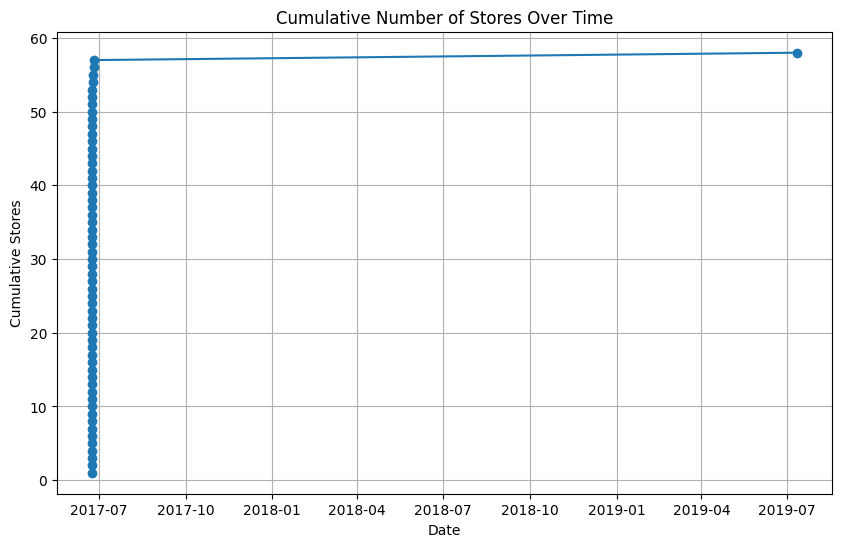

In [ ]:
import matplotlib.pyplot as plt

# Plot cumulative number of stores
plt.figure(figsize=(10, 6))
plt.plot(first_transaction_per_store_pd['first_trans_date'], first_transaction_per_store_pd['cumulative_stores'], marker='o', linestyle='-')
plt.title('Cumulative Number of Stores Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Stores')
plt.grid(True)
plt.show()

In [ ]:
from pyspark.sql import functions as F

# Count unique products per store
products_per_store = df.groupBy("store_id").agg(F.countDistinct("prod_id").alias("unique_products"))

# Calculate the average number of unique products per store
avg_products_per_store = products_per_store.agg(F.avg("unique_products").alias("average_unique_products"))

avg_products_per_store.show()

In [ ]:
# Show basic statistics for the distribution
products_per_store.describe("unique_products").show()

products_per_store_pd = products_per_store.toPandas()
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(products_per_store_pd['unique_products'], bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Unique Products per Store')
plt.xlabel('Number of Unique Products')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
from pyspark.sql import functions as F
unique_products_per_store = df.groupBy("store_id").agg(
    F.countDistinct("prod_id").alias("unique_products")
)
total_revenue_per_store = df.groupBy("store_id").agg(
    F.sum("sales_amt").alias("total_revenue")
)

store_performance = unique_products_per_store.join(
    total_revenue_per_store, "store_id"
)


In [ ]:
# Assume each unique product represents 10 square feet of store space
store_performance = store_performance.withColumn(
    "estimated_store_size", F.col("unique_products") * 10
)

store_performance = store_performance.withColumn(
    "revenue_per_sq_ft", F.col("total_revenue") / F.col("estimated_store_size")
)

best_performing_store = store_performance.orderBy("revenue_per_sq_ft", ascending=False)

best_performing_store.show()

In [ ]:
# Calculate average number of unique products across all stores
avg_unique_products_all_stores = unique_products_per_store.agg(
    F.avg("unique_products").alias("avg_unique_products")
).collect()[0]['avg_unique_products']

# Filter best stores and calculate their average unique products
avg_unique_products_best_stores = unique_products_per_store.filter(
    unique_products_per_store.store_id.isin(best_stores)
).agg(
    F.avg("unique_products").alias("avg_unique_products_best_stores")
).collect()[0]['avg_unique_products_best_stores']

print(f"Average unique products across all stores: {avg_unique_products_all_stores}")
print(f"Average unique products in best stores: {avg_unique_products_best_stores}")


In [ ]:
# Calculate average revenue across all stores
avg_revenue_all_stores = total_revenue_per_store.agg(
    F.avg("total_revenue").alias("avg_revenue")
).collect()[0]['avg_revenue']

# Filter best stores and calculate their average revenue
avg_revenue_best_stores = total_revenue_per_store.filter(
    total_revenue_per_store.store_id.isin(best_stores)
).agg(
    F.avg("total_revenue").alias("avg_revenue_best_stores")
).collect()[0]['avg_revenue_best_stores']

print(f"Average revenue across all stores: {avg_revenue_all_stores}")
print(f"Average revenue in best stores: {avg_revenue_best_stores}")


In [ ]:
best_stores_sales = df.filter(df.store_id.isin(best_stores))

# Aggregate sales by product to find best-selling products
best_selling_products = best_stores_sales.groupBy("prod_id").agg(
    F.sum("sales_amt").alias("total_sales")
).orderBy("total_sales", ascending=False)

# Aggregate sales by product category to find best-selling categories
best_selling_categories = best_stores_sales.groupBy("prod_category").agg(
    F.sum("sales_amt").alias("total_sales")
).orderBy("total_sales", ascending=False)

best_selling_products.show()
best_selling_categories.show()
